   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

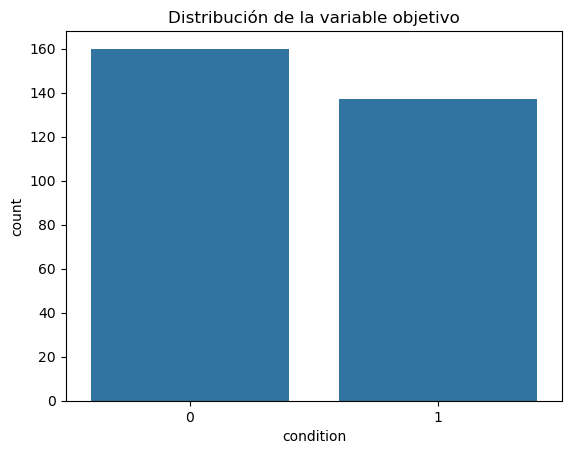

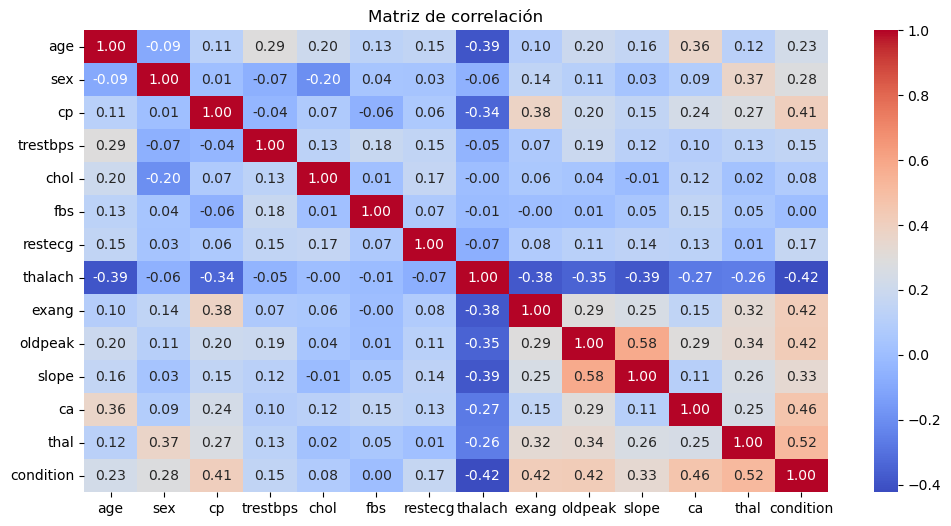

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
🔹 Precisión del Modelo: 0.9166666666666666

🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



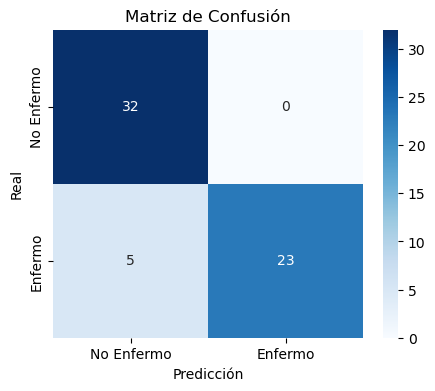

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el dataset
heart_df = pd.read_csv("heart_cleveland_upload.csv")  # Asegúrate de que el archivo está en el mismo directorio

# --- 1️⃣ Análisis Exploratorio ---
print(heart_df.head())  # Ver primeras filas
print(heart_df.info())  # Información general del dataset
print(heart_df.describe())  # Estadísticas generales

# Visualizar la distribución de la variable objetivo ('condition')
sns.countplot(x=heart_df['condition'])
plt.title("Distribución de la variable objetivo")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(heart_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# --- 2️⃣ Preprocesamiento de Datos ---
# Convertir 'condition' en una variable binaria (1: enfermedad, 0: sin enfermedad)
heart_df['target'] = heart_df['condition'].apply(lambda x: 1 if x > 0 else 0)

# Eliminar la columna original 'condition' ya que creamos 'target'
heart_df.drop(columns=['condition'], inplace=True)

# Verificar valores nulos
print(heart_df.isnull().sum())  # No debería haber valores nulos

# Estandarizar los datos numéricos
scaler = StandardScaler()
columnas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_df[columnas_numericas] = scaler.fit_transform(heart_df[columnas_numericas])

# --- 3️⃣ Selección de Características ---
X = heart_df.drop(columns=['target'])  # Variables predictoras
y = heart_df['target']  # Variable objetivo

# --- 4️⃣ División en Train y Test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 5️⃣ Entrenamiento del Modelo ---
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# --- 6️⃣ Evaluación del Modelo ---
y_pred = modelo.predict(X_test)

print("🔹 Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\n🔹 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['No Enfermo', 'Enfermo'], yticklabels=['No Enfermo', 'Enfermo'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [3]:
print(heart_df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [4]:
heart_df['target'] = heart_df['num'].apply(lambda x: 1 if x > 0 else 0)

KeyError: 'num'

In [5]:
print(heart_df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

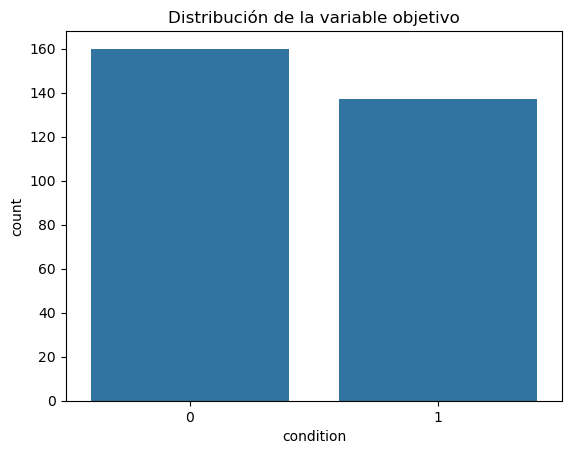

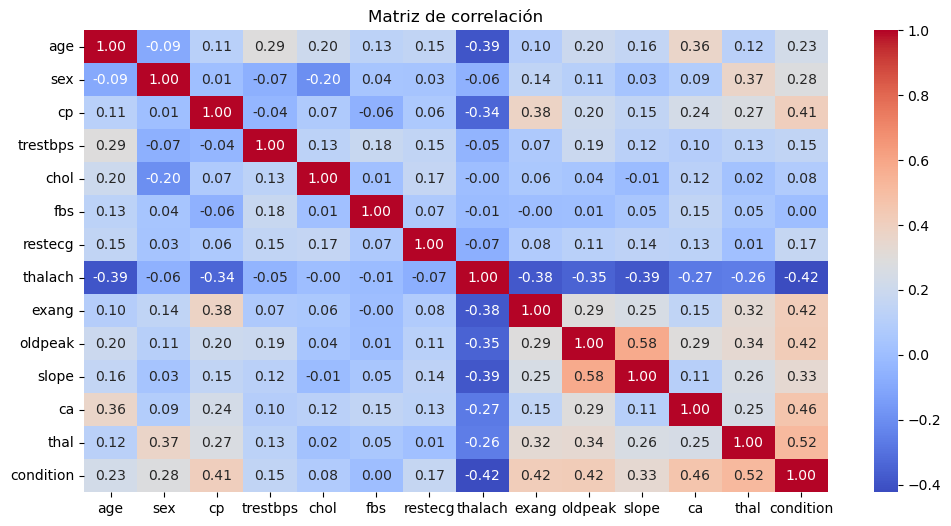

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
🔹 Precisión del Modelo: 0.9166666666666666

🔹 Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60



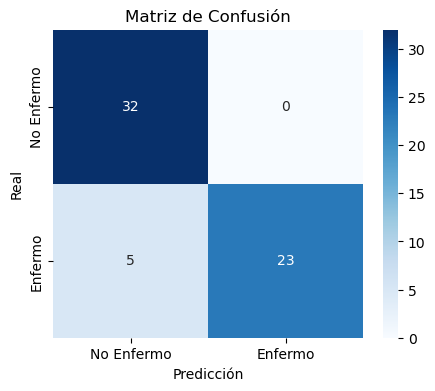

In [7]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el dataset
heart_df = pd.read_csv("heart_cleveland_upload.csv")  # Asegúrate de que el archivo está en el mismo directorio

# --- 1️⃣ Análisis Exploratorio ---
print(heart_df.head())  # Ver primeras filas
print(heart_df.info())  # Información general del dataset
print(heart_df.describe())  # Estadísticas generales

# Visualizar la distribución de la variable objetivo ('condition')
sns.countplot(x=heart_df['condition'])
plt.title("Distribución de la variable objetivo")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(heart_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# --- 2️⃣ Preprocesamiento de Datos ---
# Convertir 'condition' en una variable binaria (1: enfermedad, 0: sin enfermedad)
heart_df['target'] = heart_df['condition'].apply(lambda x: 1 if x > 0 else 0)

# Eliminar la columna original 'condition' ya que creamos 'target'
heart_df.drop(columns=['condition'], inplace=True)

# Verificar valores nulos
print(heart_df.isnull().sum())  # No debería haber valores nulos

# Estandarizar los datos numéricos
scaler = StandardScaler()
columnas_numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_df[columnas_numericas] = scaler.fit_transform(heart_df[columnas_numericas])

# --- 3️⃣ Selección de Características ---
X = heart_df.drop(columns=['target'])  # Variables predictoras
y = heart_df['target']  # Variable objetivo

# --- 4️⃣ División en Train y Test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 5️⃣ Entrenamiento del Modelo ---
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# --- 6️⃣ Evaluación del Modelo ---
y_pred = modelo.predict(X_test)

print("🔹 Precisión del Modelo:", accuracy_score(y_test, y_pred))
print("\n🔹 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['No Enfermo', 'Enfermo'], yticklabels=['No Enfermo', 'Enfermo'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()
